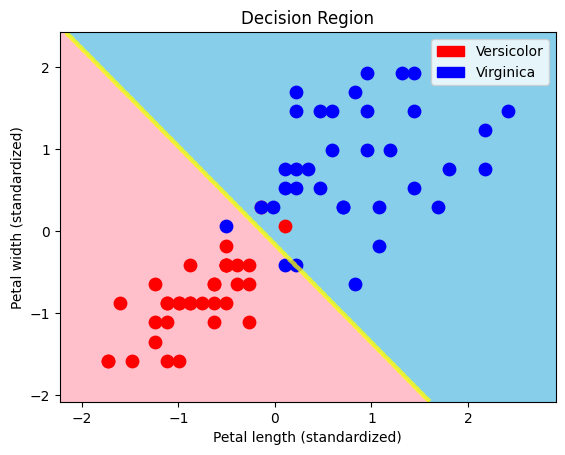

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to visualize decision regions
def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='X-axis', ylabel='Y-axis', target_names=['Versicolor', 'Virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='yellow', linewidths=3, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only two classes (Versicolor and Virginica) and two features (petal length and width)
X = X[y != 0, 2:4]
y = y[y != 0]
y = y - 1  # Convert labels from 1 and 2 to 0 and 1

# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_std, y_train)

# Display decision region
decision_region(X_train_std, y_train, model, xlabel='Petal length (standardized)', ylabel='Petal width (standardized)', target_names=['Versicolor', 'Virginica'])


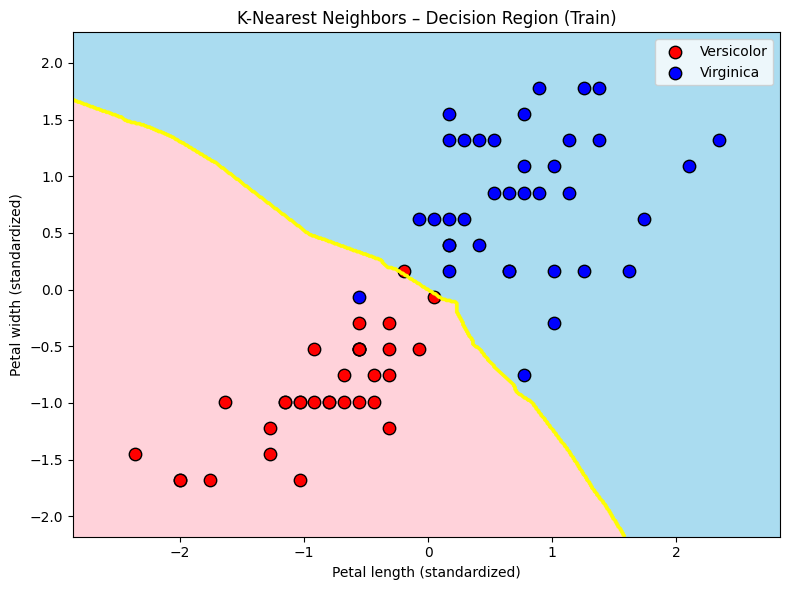

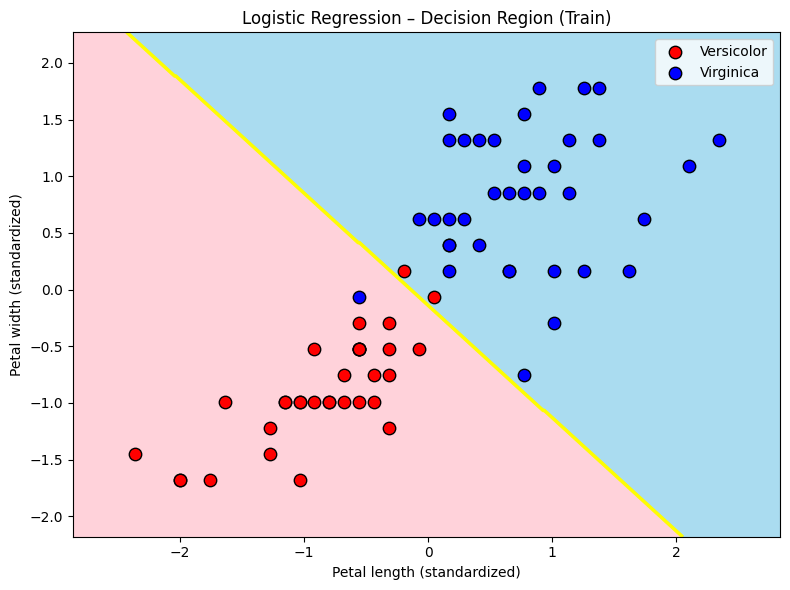

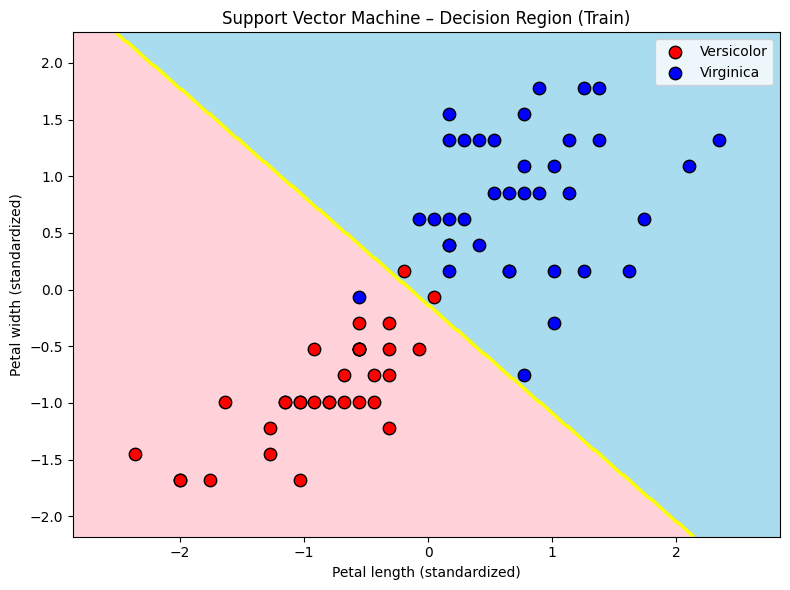

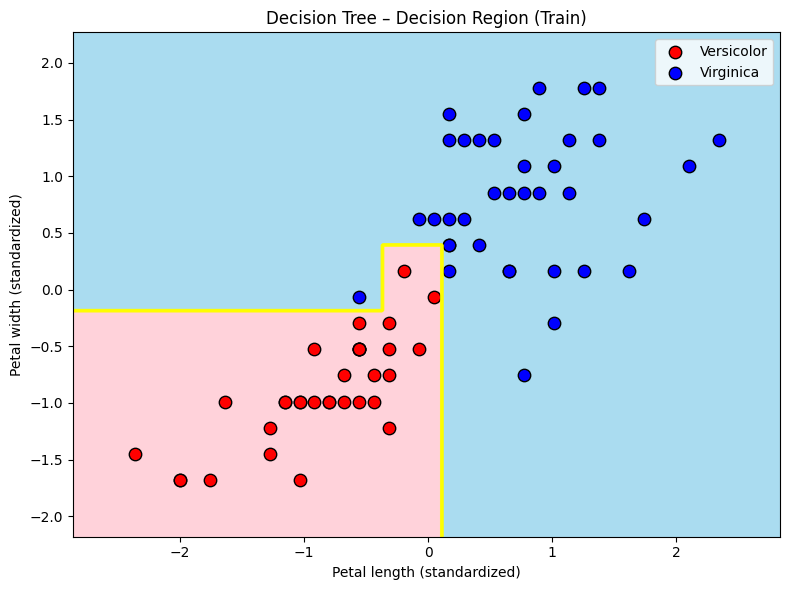

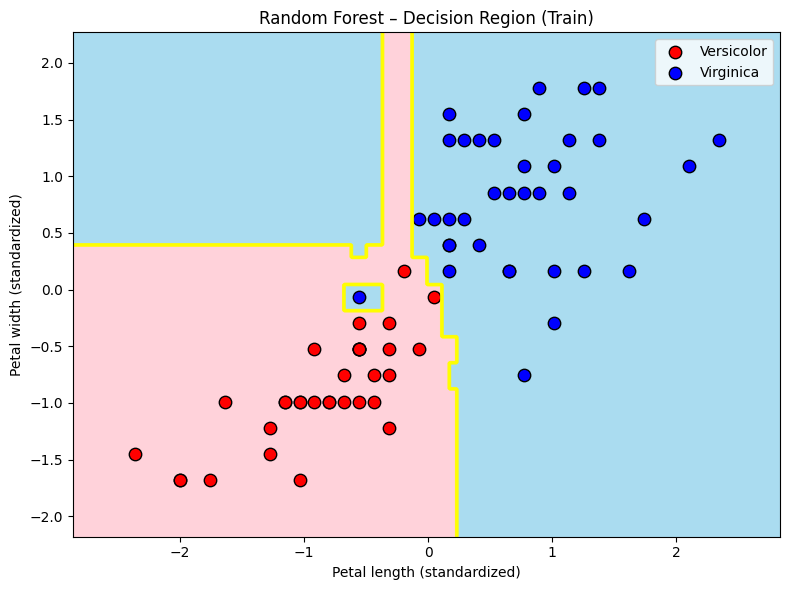

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# -----------------------------------------------------------------------------
# 1) Decision-region plotting function
# -----------------------------------------------------------------------------
def plot_decision_region(X, y, model, title,
                         step=0.01,
                         xlabel='Feature 1', ylabel='Feature 2',
                         class_names=('Class 0','Class 1')):
    # colors
    scatter_colors = ['red','blue']
    background_colors = ['pink','skyblue']
    
    # build meshgrid
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    # predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(background_colors), alpha=0.7)
    plt.contour(xx, yy, Z, colors='yellow', linewidths=2, alpha=0.5)

    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y==class_label, 0],
                    X[y==class_label, 1],
                    c=scatter_colors[idx],
                    label=class_names[idx],
                    edgecolor='k',
                    s=80)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------------
# 2) Load data & prepare binary problem
# -----------------------------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Keep only Versicolor (label=1) and Virginica (label=2)
mask = y != 0
X_bin = X[mask, 2:4]    # petal length & petal width
y_bin = y[mask] - 1     # remap to 0 & 1

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42)

# standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)


# -----------------------------------------------------------------------------
# 3) Define classifiers
# -----------------------------------------------------------------------------
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression':  LogisticRegression(max_iter=200),
    'Support Vector Machine': SVC(kernel='linear'),
    'Decision Tree':        DecisionTreeClassifier(),
    'Random Forest':        RandomForestClassifier(n_estimators=100)
}

# -----------------------------------------------------------------------------
# 4) Train each and plot its decision region (on the *training* set)
# -----------------------------------------------------------------------------
for name, clf in models.items():
    clf.fit(X_train_std, y_train)
    plot_decision_region(
        X_train_std, y_train, clf,
        title=f'{name} – Decision Region (Train)',
        xlabel='Petal length (standardized)',
        ylabel='Petal width (standardized)',
        class_names=('Versicolor','Virginica')
    )
